In [1]:
from lib.utils import *
from lib.E15Analyzer import E15Analyzer
from lib.plot_utils import *

import pandas..
importing path functions...
importing stat functions...
ipdb is not installed and cannot be imported...
importing misc functions..
importing done...
importing plot functions...


In [13]:
res = E15Analyzer.get_expr_values(basedir='../data/20180516_rna_tophat')
expr = res

In [14]:
expr

baseMean  log2FoldChange     lfcSE       stat         pvalue           padj      treatment    stimuli  time     ensembl_gene_id external_gene_name
0        595.772956        4.957064  0.181513  27.309746  3.249375e-164  5.449527e-160         KCl_6h        KCl     6  ENSMUSG00000023034              Nr4a1
1       5725.765705        4.173069  0.157104  26.562396  1.846988e-155  1.548792e-151         KCl_6h        KCl     6  ENSMUSG00000037428                Vgf
2        579.203686        5.881411  0.228083  25.786270  1.264204e-146  7.067320e-143         KCl_6h        KCl     6  ENSMUSG00000021250                Fos
3        627.062758        4.427275  0.174392  25.386845  3.523864e-142  1.477468e-138         KCl_6h        KCl     6  ENSMUSG00000045903              Npas4
4        505.389582        4.805584  0.193524  24.831924  4.054384e-136  1.359922e-132         KCl_6h        KCl     6  ENSMUSG00000048482               Bdnf
...             ...             ...       ...        ...            ...            ...            ...        ...   ...                 ...                ...
207280     2.989744        0.023372  1.502567   0.015555   9.875897e-01            NaN  forskolin_10h  forskolin    10  ENSMUSG00000099284            Mir7026
207281     0.616746       -1.855157  3.233035  -0.573813   5.660945e-01            NaN  forskolin_10h  forskolin    10  ENSMUSG00000099289            Mir6403
207282     0.395715       -1.205462  4.093186  -0.294505   7.683723e-01            NaN  forskolin_10h  forskolin    10  ENSMUSG00000099309            Mir7085
207283     1.458021        1.379193  2.100120   0.656721   5.113602e-01            NaN  forskolin_10h  forskolin    10  ENSMUSG00000099314            Gm27734
207284     7.350515        1.040972  0.978386   1.063969   2.873430e-01            NaN  forskolin_10h  forskolin    10  ENSMUSG00000099320            Mir7664

[207285 rows x 11 columns]

In [19]:
expr = expr.rename(columns={'stimuli': 'condition'})

In [22]:
expr['treatment'].value_counts()

bdnf_1h          23357
KCl_1h           23357
forskolin_1h     23357
forskolin_6h     23019
bdnf_6h          23019
KCl_6h           23019
bdnf_10h         22719
KCl_10h          22719
forskolin_10h    22719
Name: treatment, dtype: int64

In [34]:

table = []
for padj_thr in [0.01, 0.05, 0.1]:
    for treatment in ['bdnf', 'KCl']:
        last_features = set()
        for time in ['1h', '6h', '10h']:
            code = treatment + "_" + time
            print(code)
            peaks = expr[(expr['padj'] < padj_thr) & (expr['treatment'] == code)]
            old_diff_peaks = peaks[peaks['external_gene_name'].isin(last_features)]
            new_diff_peaks = peaks[~peaks['external_gene_name'].isin(last_features)]

            old_up = old_diff_peaks[old_diff_peaks['log2FoldChange'] > 0].shape[0]
            old_down = old_diff_peaks[old_diff_peaks['log2FoldChange'] < 0].shape[0]
            new_up = new_diff_peaks[new_diff_peaks['log2FoldChange'] > 0].shape[0]
            new_down = new_diff_peaks[new_diff_peaks['log2FoldChange'] < 0].shape[0]

            r = [treatment, int(time[:-1]), code, padj_thr, old_up, new_up, old_down, new_down]
            table.append(r)
            last_features = last_features.union(set(peaks['external_gene_name']))
df = pd.DataFrame(table, columns=['treatment', 'time', 'code', 'p.adj.thr', 'old.gained', 'new.gained', 'old.closed', 'new.closed'])
df

bdnf_1h
bdnf_6h
bdnf_10h
KCl_1h
KCl_6h
KCl_10h
bdnf_1h
bdnf_6h
bdnf_10h
KCl_1h
KCl_6h
KCl_10h
bdnf_1h
bdnf_6h
bdnf_10h
KCl_1h
KCl_6h
KCl_10h


treatment  time      code  p.adj.thr  old.gained  new.gained  old.closed  new.closed
0       bdnf     1   bdnf_1h       0.01           0        1268           0         518
1       bdnf     6   bdnf_6h       0.01         401         755         173         633
2       bdnf    10  bdnf_10h       0.01         862         262         525         182
3        KCl     1    KCl_1h       0.01           0        1551           0        1577
4        KCl     6    KCl_6h       0.01         888        1753         476        1752
5        KCl    10   KCl_10h       0.01        1703         406        1346         261
6       bdnf     1   bdnf_1h       0.05           0        1701           0         904
7       bdnf     6   bdnf_6h       0.05         654        1068         320         988
8       bdnf    10  bdnf_10h       0.05        1352         350         878         327
9        KCl     1    KCl_1h       0.05           0        2274           0        2230
10       KCl     6    KCl_6h       0.05        1409        1947         870        2122
11       KCl    10   KCl_10h       0.05        2365         477        1967         342
12      bdnf     1   bdnf_1h       0.10           0        1998           0        1203
13      bdnf     6   bdnf_6h       0.10         888        1326         460        1258
14      bdnf    10  bdnf_10h       0.10        1759         365        1211         405
15       KCl     1    KCl_1h       0.10           0        2733           0        2619
16       KCl     6    KCl_6h       0.10        1760        2016        1166        2304
17       KCl    10   KCl_10h       0.10        2755         522        2408         379

In [102]:
expr = expr[expr['condition'] != 'forskolin']

In [113]:
fdr10 = set(expr[expr['padj'] < 0.1]['external_gene_name'])
fdr01 = set(expr[expr['padj'] < 0.01]['external_gene_name'])

(1 - (len(fdr10 - fdr01) / len(fdr10))

0.7152976893236633

[1.0] [0.0]
[1.0] [1268.0]
down 2 [-0.0] [0]
down 3 [-518.0] [-0.0]
[2.25] [401.0]
[2.25] [755.0]
down 2 [-173.0] [0]
down 3 [-633.0] [-173.0]
[3.5] [862.0]
[3.5] [262.0]
down 2 [-525.0] [0]
down 3 [-182.0] [-525.0]
[4.75] [0.0]
[4.75] [1551.0]
down 2 [-0.0] [0]
down 3 [-1577.0] [-0.0]
[6.0] [888.0]
[6.0] [1753.0]
down 2 [-476.0] [0]
down 3 [-1752.0] [-476.0]
[7.25] [1703.0]
[7.25] [406.0]
down 2 [-1346.0] [0]
down 3 [-261.0] [-1346.0]
[1.0] [0.0]
[1.0] [1701.0]
down 2 [-0.0] [0]
down 3 [-904.0] [-0.0]
[2.25] [654.0]
[2.25] [1068.0]
down 2 [-320.0] [0]
down 3 [-988.0] [-320.0]
[3.5] [1352.0]
[3.5] [350.0]
down 2 [-878.0] [0]
down 3 [-327.0] [-878.0]
[4.75] [0.0]
[4.75] [2274.0]
down 2 [-0.0] [0]
down 3 [-2230.0] [-0.0]
[6.0] [1409.0]
[6.0] [1947.0]
down 2 [-870.0] [0]
down 3 [-2122.0] [-870.0]
[7.25] [2365.0]
[7.25] [477.0]
down 2 [-1967.0] [0]
down 3 [-342.0] [-1967.0]
[1.0] [0.0]
[1.0] [1998.0]
down 2 [-0.0] [0]
down 3 [-1203.0] [-0.0]
[2.25] [888.0]
[2.25] [1326.0]
down 2 [-460.0] [

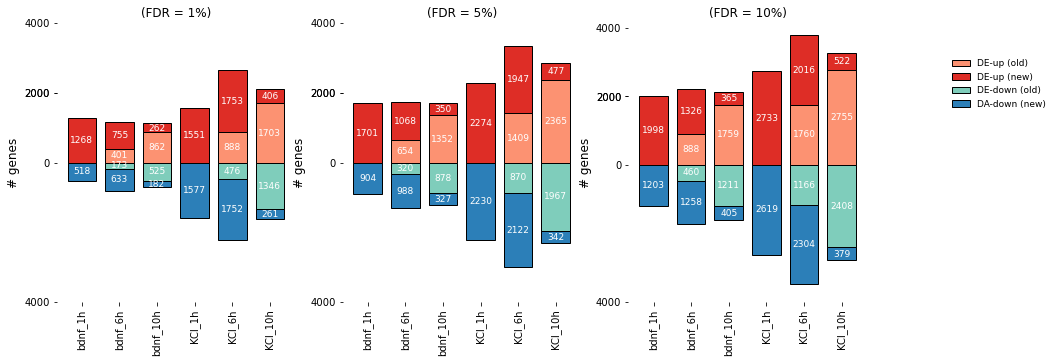

In [98]:
fig = plt.figure(figsize=[45, 5])
for pi, curr_thr in enumerate([0.01, 0.05, 0.1]):
    df_sel = df[df['p.adj.thr'] == curr_thr]
    values = [list(r.values[4:]) for ri, r in df_sel.iterrows()]
    # print(values)

    N = 2
    ind = np.arange(N)    # the x locations for the groups
    width = 0.95       # the width of the bars: can also be len(x) sequence

    ax = plt.subplot(1, 3, pi + 1)
    xticks = []
    gained_new, gained_old = '#fc9272', '#de2d26'
    closed_new, closed_old = '#7fcdbb', '#2c7fb8'
    for i, v in enumerate(values):
        # print('next value', i)
        ind = [i + 1 + 0.5 * (i / 2)]
        xticks.append(ind[0])
        counts = v
        v = [float(vi) for vi in v]
        # print( v)
        colors = [gained_new, gained_old, closed_new, closed_old]
        for j in range(len(v[:2])):
            y, bottom = [v[j]], [sum([vi for vi in v[:j]])]
            # print( 'up', j, y, bottom)
            print(ind, y)
            plt.bar(ind, y, width, bottom=bottom, color=colors[j], edgecolor='black')
            if counts[j] == 0:
                continue
            xtext, ytext = ind[0], bottom[0] + y[0] / 2
            # print( xtext, ytext)
            ax.text(xtext, ytext, str(counts[j]), ha='center', va='center', color='white', rotation=0, fontsize=9)
        for j in range(2, len(v)):
            y, bottom = [-v[j]], [-sum([vi for vi in v[2:j]])]
            print('down', j, y, bottom)
            p1 = plt.bar(ind, y, width, bottom=bottom, color=colors[j], edgecolor='black')
            if counts[j] == 0:
                continue
            xtext, ytext = ind[0], bottom[0] + y[0] / 2
            ax.text(xtext, ytext, str(counts[j]), ha='center', va='center', color='white', rotation=0, fontsize=9)
    despine_all()

    # print(xticks, list(df_sel['code']))
    plt.xticks(xticks, list(df_sel['code']), rotation=90, ha='center')

    yticks = [-4000, 2000, 0, 2000, 4000]
    plt.yticks(yticks, [str(y).replace("-", '') for y in yticks])
    # plt.yticks(yticks, [str(y).replace("-", '') for y in yticks])
    plt.legend(['DE-up (old)', 'DE-up (new)', 'DE-down (old)', 'DA-down (new)'],
               frameon=False, fontsize=9, bbox_to_anchor=[1.325, .9])

    plt.ylabel('# genes', fontsize=12)
    plt.title('(FDR = %.0f%%)' % (curr_thr * 100))
    plt.subplots_adjust(left=0.0, top=0.9, right=0.25)

    # ax = plt.axes()
    # ax.xaxis.set_ticks_position('none')
    # plt.xlim([0, 5.5])
    # plt.tight_layout()
    # savepdf('../output/plots/de_genes_barplot')
    # plt.show()
    # plt.close()
plt.show()


In [49]:
%matplotlib inline

In [1]:
from lib.utils import *
from lib.E15Analyzer import E15Analyzer
from lib.plot_utils import *

import pandas..
importing path functions...
importing stat functions...
ipdb is not installed and cannot be imported...
importing misc functions..
importing done...
importing plot functions...


In [13]:
res = E15Analyzer.get_expr_values(basedir='../data/20180516_rna_tophat')
expr = res

In [14]:
expr

baseMean  log2FoldChange     lfcSE       stat         pvalue           padj      treatment    stimuli  time     ensembl_gene_id external_gene_name
0        595.772956        4.957064  0.181513  27.309746  3.249375e-164  5.449527e-160         KCl_6h        KCl     6  ENSMUSG00000023034              Nr4a1
1       5725.765705        4.173069  0.157104  26.562396  1.846988e-155  1.548792e-151         KCl_6h        KCl     6  ENSMUSG00000037428                Vgf
2        579.203686        5.881411  0.228083  25.786270  1.264204e-146  7.067320e-143         KCl_6h        KCl     6  ENSMUSG00000021250                Fos
3        627.062758        4.427275  0.174392  25.386845  3.523864e-142  1.477468e-138         KCl_6h        KCl     6  ENSMUSG00000045903              Npas4
4        505.389582        4.805584  0.193524  24.831924  4.054384e-136  1.359922e-132         KCl_6h        KCl     6  ENSMUSG00000048482               Bdnf
...             ...             ...       ...        ...            ...            ...            ...        ...   ...                 ...                ...
207280     2.989744        0.023372  1.502567   0.015555   9.875897e-01            NaN  forskolin_10h  forskolin    10  ENSMUSG00000099284            Mir7026
207281     0.616746       -1.855157  3.233035  -0.573813   5.660945e-01            NaN  forskolin_10h  forskolin    10  ENSMUSG00000099289            Mir6403
207282     0.395715       -1.205462  4.093186  -0.294505   7.683723e-01            NaN  forskolin_10h  forskolin    10  ENSMUSG00000099309            Mir7085
207283     1.458021        1.379193  2.100120   0.656721   5.113602e-01            NaN  forskolin_10h  forskolin    10  ENSMUSG00000099314            Gm27734
207284     7.350515        1.040972  0.978386   1.063969   2.873430e-01            NaN  forskolin_10h  forskolin    10  ENSMUSG00000099320            Mir7664

[207285 rows x 11 columns]

In [19]:
expr = expr.rename(columns={'stimuli': 'condition'})

In [22]:
expr['treatment'].value_counts()

bdnf_1h          23357
KCl_1h           23357
forskolin_1h     23357
forskolin_6h     23019
bdnf_6h          23019
KCl_6h           23019
bdnf_10h         22719
KCl_10h          22719
forskolin_10h    22719
Name: treatment, dtype: int64

In [34]:

table = []
for padj_thr in [0.01, 0.05, 0.1]:
    for treatment in ['bdnf', 'KCl']:
        last_features = set()
        for time in ['1h', '6h', '10h']:
            code = treatment + "_" + time
            print(code)
            peaks = expr[(expr['padj'] < padj_thr) & (expr['treatment'] == code)]
            old_diff_peaks = peaks[peaks['external_gene_name'].isin(last_features)]
            new_diff_peaks = peaks[~peaks['external_gene_name'].isin(last_features)]

            old_up = old_diff_peaks[old_diff_peaks['log2FoldChange'] > 0].shape[0]
            old_down = old_diff_peaks[old_diff_peaks['log2FoldChange'] < 0].shape[0]
            new_up = new_diff_peaks[new_diff_peaks['log2FoldChange'] > 0].shape[0]
            new_down = new_diff_peaks[new_diff_peaks['log2FoldChange'] < 0].shape[0]

            r = [treatment, int(time[:-1]), code, padj_thr, old_up, new_up, old_down, new_down]
            table.append(r)
            last_features = last_features.union(set(peaks['external_gene_name']))
df = pd.DataFrame(table, columns=['treatment', 'time', 'code', 'p.adj.thr', 'old.gained', 'new.gained', 'old.closed', 'new.closed'])
df

bdnf_1h
bdnf_6h
bdnf_10h
KCl_1h
KCl_6h
KCl_10h
bdnf_1h
bdnf_6h
bdnf_10h
KCl_1h
KCl_6h
KCl_10h
bdnf_1h
bdnf_6h
bdnf_10h
KCl_1h
KCl_6h
KCl_10h


treatment  time      code  p.adj.thr  old.gained  new.gained  old.closed  new.closed
0       bdnf     1   bdnf_1h       0.01           0        1268           0         518
1       bdnf     6   bdnf_6h       0.01         401         755         173         633
2       bdnf    10  bdnf_10h       0.01         862         262         525         182
3        KCl     1    KCl_1h       0.01           0        1551           0        1577
4        KCl     6    KCl_6h       0.01         888        1753         476        1752
5        KCl    10   KCl_10h       0.01        1703         406        1346         261
6       bdnf     1   bdnf_1h       0.05           0        1701           0         904
7       bdnf     6   bdnf_6h       0.05         654        1068         320         988
8       bdnf    10  bdnf_10h       0.05        1352         350         878         327
9        KCl     1    KCl_1h       0.05           0        2274           0        2230
10       KCl     6    KCl_6h       0.05        1409        1947         870        2122
11       KCl    10   KCl_10h       0.05        2365         477        1967         342
12      bdnf     1   bdnf_1h       0.10           0        1998           0        1203
13      bdnf     6   bdnf_6h       0.10         888        1326         460        1258
14      bdnf    10  bdnf_10h       0.10        1759         365        1211         405
15       KCl     1    KCl_1h       0.10           0        2733           0        2619
16       KCl     6    KCl_6h       0.10        1760        2016        1166        2304
17       KCl    10   KCl_10h       0.10        2755         522        2408         379

In [102]:
expr = expr[expr['condition'] != 'forskolin']

In [113]:
fdr10 = set(expr[expr['padj'] < 0.1]['external_gene_name'])
fdr01 = set(expr[expr['padj'] < 0.01]['external_gene_name'])

(1 - (len(fdr10 - fdr01) / len(fdr10))

0.7152976893236633

[1.0] [0.0]
[1.0] [1268.0]
down 2 [-0.0] [0]
down 3 [-518.0] [-0.0]
[2.25] [401.0]
[2.25] [755.0]
down 2 [-173.0] [0]
down 3 [-633.0] [-173.0]
[3.5] [862.0]
[3.5] [262.0]
down 2 [-525.0] [0]
down 3 [-182.0] [-525.0]
[4.75] [0.0]
[4.75] [1551.0]
down 2 [-0.0] [0]
down 3 [-1577.0] [-0.0]
[6.0] [888.0]
[6.0] [1753.0]
down 2 [-476.0] [0]
down 3 [-1752.0] [-476.0]
[7.25] [1703.0]
[7.25] [406.0]
down 2 [-1346.0] [0]
down 3 [-261.0] [-1346.0]
[1.0] [0.0]
[1.0] [1701.0]
down 2 [-0.0] [0]
down 3 [-904.0] [-0.0]
[2.25] [654.0]
[2.25] [1068.0]
down 2 [-320.0] [0]
down 3 [-988.0] [-320.0]
[3.5] [1352.0]
[3.5] [350.0]
down 2 [-878.0] [0]
down 3 [-327.0] [-878.0]
[4.75] [0.0]
[4.75] [2274.0]
down 2 [-0.0] [0]
down 3 [-2230.0] [-0.0]
[6.0] [1409.0]
[6.0] [1947.0]
down 2 [-870.0] [0]
down 3 [-2122.0] [-870.0]
[7.25] [2365.0]
[7.25] [477.0]
down 2 [-1967.0] [0]
down 3 [-342.0] [-1967.0]
[1.0] [0.0]
[1.0] [1998.0]
down 2 [-0.0] [0]
down 3 [-1203.0] [-0.0]
[2.25] [888.0]
[2.25] [1326.0]
down 2 [-460.0] [

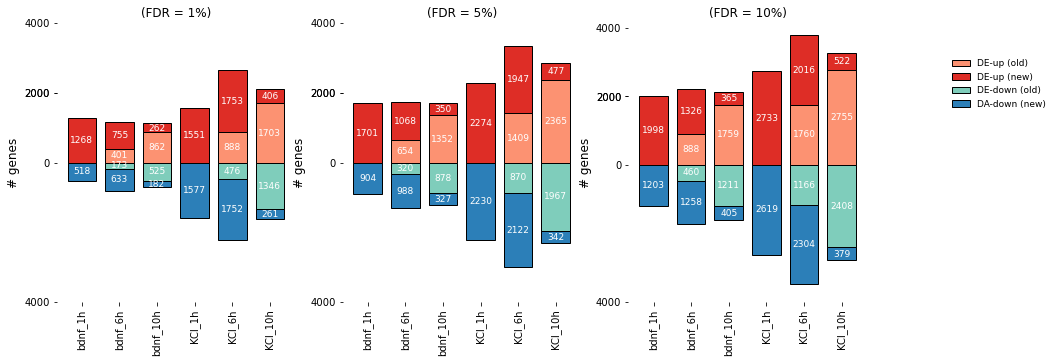

In [98]:
fig = plt.figure(figsize=[45, 5])
for pi, curr_thr in enumerate([0.01, 0.05, 0.1]):
    df_sel = df[df['p.adj.thr'] == curr_thr]
    values = [list(r.values[4:]) for ri, r in df_sel.iterrows()]
    # print(values)

    N = 2
    ind = np.arange(N)    # the x locations for the groups
    width = 0.95       # the width of the bars: can also be len(x) sequence

    ax = plt.subplot(1, 3, pi + 1)
    xticks = []
    gained_new, gained_old = '#fc9272', '#de2d26'
    closed_new, closed_old = '#7fcdbb', '#2c7fb8'
    for i, v in enumerate(values):
        # print('next value', i)
        ind = [i + 1 + 0.5 * (i / 2)]
        xticks.append(ind[0])
        counts = v
        v = [float(vi) for vi in v]
        # print( v)
        colors = [gained_new, gained_old, closed_new, closed_old]
        for j in range(len(v[:2])):
            y, bottom = [v[j]], [sum([vi for vi in v[:j]])]
            # print( 'up', j, y, bottom)
            print(ind, y)
            plt.bar(ind, y, width, bottom=bottom, color=colors[j], edgecolor='black')
            if counts[j] == 0:
                continue
            xtext, ytext = ind[0], bottom[0] + y[0] / 2
            # print( xtext, ytext)
            ax.text(xtext, ytext, str(counts[j]), ha='center', va='center', color='white', rotation=0, fontsize=9)
        for j in range(2, len(v)):
            y, bottom = [-v[j]], [-sum([vi for vi in v[2:j]])]
            print('down', j, y, bottom)
            p1 = plt.bar(ind, y, width, bottom=bottom, color=colors[j], edgecolor='black')
            if counts[j] == 0:
                continue
            xtext, ytext = ind[0], bottom[0] + y[0] / 2
            ax.text(xtext, ytext, str(counts[j]), ha='center', va='center', color='white', rotation=0, fontsize=9)
    despine_all()

    # print(xticks, list(df_sel['code']))
    plt.xticks(xticks, list(df_sel['code']), rotation=90, ha='center')

    yticks = [-4000, 2000, 0, 2000, 4000]
    plt.yticks(yticks, [str(y).replace("-", '') for y in yticks])
    # plt.yticks(yticks, [str(y).replace("-", '') for y in yticks])
    plt.legend(['DE-up (old)', 'DE-up (new)', 'DE-down (old)', 'DA-down (new)'],
               frameon=False, fontsize=9, bbox_to_anchor=[1.325, .9])

    plt.ylabel('# genes', fontsize=12)
    plt.title('(FDR = %.0f%%)' % (curr_thr * 100))
    plt.subplots_adjust(left=0.0, top=0.9, right=0.25)

    # ax = plt.axes()
    # ax.xaxis.set_ticks_position('none')
    # plt.xlim([0, 5.5])
    # plt.tight_layout()
    # savepdf('../output/plots/de_genes_barplot')
    # plt.show()
    # plt.close()
plt.show()


### Same stuff for peaks

In [1]:
from lib.utils import *
from lib.E15Analyzer import E15Analyzer
from lib.plot_utils import *

import pandas..
importing path functions...
importing stat functions...
ipdb is not installed and cannot be imported...
importing misc functions..
importing done...
importing plot functions...


In [120]:
E15Analyzer.get_atac_values?

Signature:
E15Analyzer.get_atac_values(
    trimmed_reads=True,
    datadir=None,
    atac_dir=None,
)
Docstring: <no docstring>
File:      /mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/wild/lib/E15Analyzer.py
Type:      function


In [122]:
res = E15Analyzer.get_atac_values(datadir='../data/atac_loess_comparisons/extend_0_trimmed_pooledpeaks')
expr = res

reading atac values...
../data/atac_loess_comparisons/extend_0_trimmed_pooledpeaks/all_peaks_counts.tsv.gz True


In [128]:
expr = expr.rename(columns={'treatment': 'condition'})

In [131]:
expr = expr[~expr['condition'].str.contains('Forskolin')]
expr['condition'].value_counts()


bdnf_6h     58724
KCl_6h      58724
KCl_10h     58724
KCl_1h      58724
bdnf_10h    58724
bdnf_1h     58724
Name: condition, dtype: int64

In [136]:

table = []
for padj_thr in [0.01, 0.05, 0.1]:
    for treatment in ['bdnf', 'KCl']:
        last_features = set()
        for time in ['1h', '6h', '10h']:
            code = treatment + "_" + time
            print(code)
            peaks = expr[(expr['padj'] < padj_thr) & (expr['condition'] == code)]
            old_diff_peaks = peaks[peaks['k'].isin(last_features)]
            new_diff_peaks = peaks[~peaks['k'].isin(last_features)]

            old_up = old_diff_peaks[old_diff_peaks['log2FoldChange'] > 0].shape[0]
            old_down = old_diff_peaks[old_diff_peaks['log2FoldChange'] < 0].shape[0]
            new_up = new_diff_peaks[new_diff_peaks['log2FoldChange'] > 0].shape[0]
            new_down = new_diff_peaks[new_diff_peaks['log2FoldChange'] < 0].shape[0]

            r = [treatment, int(time[:-1]), code, padj_thr, old_up, new_up, old_down, new_down]
            table.append(r)
            last_features = last_features.union(set(peaks['k']))
df = pd.DataFrame(table, columns=['treatment', 'time', 'code', 'p.adj.thr', 'old.gained', 'new.gained', 'old.closed', 'new.closed'])
df

bdnf_1h
bdnf_6h
bdnf_10h
KCl_1h
KCl_6h
KCl_10h
bdnf_1h
bdnf_6h
bdnf_10h
KCl_1h
KCl_6h
KCl_10h
bdnf_1h
bdnf_6h
bdnf_10h
KCl_1h
KCl_6h
KCl_10h


treatment  time      code  p.adj.thr  old.gained  new.gained  old.closed  new.closed
0       bdnf     1   bdnf_1h       0.01           0        4074           0         491
1       bdnf     6   bdnf_6h       0.01        2199         269          21          85
2       bdnf    10  bdnf_10h       0.01        1759         176           5          50
3        KCl     1    KCl_1h       0.01           0         501           0         220
4        KCl     6    KCl_6h       0.01         159         586          22         100
5        KCl    10   KCl_10h       0.01         462         459          16          62
6       bdnf     1   bdnf_1h       0.05           0        5445           0        1594
7       bdnf     6   bdnf_6h       0.05        3095         358         140         336
8       bdnf    10  bdnf_10h       0.05        2573         296          68         274
9        KCl     1    KCl_1h       0.05           0        1350           0         796
10       KCl     6    KCl_6h       0.05         464        1108          80         334
11       KCl    10   KCl_10h       0.05         998         763          99         340
12      bdnf     1   bdnf_1h       0.10           0        6379           0        2633
13      bdnf     6   bdnf_6h       0.10        3685         446         338         672
14      bdnf    10  bdnf_10h       0.10        3148         418         180         579
15       KCl     1    KCl_1h       0.10           0        2168           0        1533
16       KCl     6    KCl_6h       0.10         741        1551         203         640
17       KCl    10   KCl_10h       0.10        1485        1025         244         666

In [137]:
expr = expr[expr['condition'] != 'forskolin']

In [145]:
fdr10 = set(expr[expr['padj'] < 0.1]['k'])
fdr01 = set(expr[expr['padj'] < 0.01]['k'])

1 - (len(fdr10 - fdr01) / len(fdr10))

0.3907289043837562

In [147]:
fig = plt.figure(figsize=[45, 5])
for pi, curr_thr in enumerate([0.01, 0.05, 0.1]):
    df_sel = df[df['p.adj.thr'] == curr_thr]
    values = [list(r.values[4:]) for ri, r in df_sel.iterrows()]
    # print(values)

    N = 2
    ind = np.arange(N)    # the x locations for the groups
    width = 0.95       # the width of the bars: can also be len(x) sequence

    ax = plt.subplot(1, 3, pi + 1)
    xticks = []
    gained_new, gained_old = '#fc9272', '#de2d26'
    closed_new, closed_old = '#7fcdbb', '#2c7fb8'
    for i, v in enumerate(values):
        # print('next value', i)
        ind = [i + 1 + 0.5 * (i / 2)]
        xticks.append(ind[0])
        counts = v
        v = [float(vi) for vi in v]
        # print( v)
        colors = [gained_new, gained_old, closed_new, closed_old]
        for j in range(len(v[:2])):
            y, bottom = [v[j]], [sum([vi for vi in v[:j]])]
            # print( 'up', j, y, bottom)
            print(ind, y)
            plt.bar(ind, y, width, bottom=bottom, color=colors[j], edgecolor='black')
            if counts[j] == 0:
                continue
            xtext, ytext = ind[0], bottom[0] + y[0] / 2
            # print( xtext, ytext)
            ax.text(xtext, ytext, str(counts[j]), ha='center', va='center', color='white', rotation=0, fontsize=9)
        for j in range(2, len(v)):
            y, bottom = [-v[j]], [-sum([vi for vi in v[2:j]])]
            print('down', j, y, bottom)
            p1 = plt.bar(ind, y, width, bottom=bottom, color=colors[j], edgecolor='black')
            if counts[j] == 0:
                continue
            xtext, ytext = ind[0], bottom[0] + y[0] / 2
            ax.text(xtext, ytext, str(counts[j]), ha='center', va='center', color='white', rotation=0, fontsize=9)
    despine_all()

    # print(xticks, list(df_sel['code']))
    plt.xticks(xticks, list(df_sel['code']), rotation=90, ha='center')

    yticks = [-4000, 2000, 0, 2000, 4000]
    plt.yticks(yticks, [str(y).replace("-", '') for y in yticks])
    # plt.yticks(yticks, [str(y).replace("-", '') for y in yticks])
    plt.legend(['DA-gained (old)', 'DA-gained (new)', 'DA-closed (old)', 'DA-closed (new)'],
               frameon=False, fontsize=9, bbox_to_anchor=[1.325, .9])

    plt.ylabel('# genes', fontsize=12)
    plt.title('(FDR = %.0f%%)' % (curr_thr * 100))
    plt.subplots_adjust(left=0.0, top=0.9, right=0.25)

    # ax = plt.axes()
    # ax.xaxis.set_ticks_position('none')
    # plt.xlim([0, 5.5])
    # plt.tight_layout()
    # savepdf('../output/plots/de_genes_barplot')
    # plt.show()
    # plt.close()
plt.show()


[1.0] [0.0]
[1.0] [4074.0]
down 2 [-0.0] [0]
down 3 [-491.0] [-0.0]
[2.25] [2199.0]
[2.25] [269.0]
down 2 [-21.0] [0]
down 3 [-85.0] [-21.0]
[3.5] [1759.0]
[3.5] [176.0]
down 2 [-5.0] [0]
down 3 [-50.0] [-5.0]
[4.75] [0.0]
[4.75] [501.0]
down 2 [-0.0] [0]
down 3 [-220.0] [-0.0]
[6.0] [159.0]
[6.0] [586.0]
down 2 [-22.0] [0]
down 3 [-100.0] [-22.0]
[7.25] [462.0]
[7.25] [459.0]
down 2 [-16.0] [0]
down 3 [-62.0] [-16.0]
[1.0] [0.0]
[1.0] [5445.0]
down 2 [-0.0] [0]
down 3 [-1594.0] [-0.0]
[2.25] [3095.0]
[2.25] [358.0]
down 2 [-140.0] [0]
down 3 [-336.0] [-140.0]
[3.5] [2573.0]
[3.5] [296.0]
down 2 [-68.0] [0]
down 3 [-274.0] [-68.0]
[4.75] [0.0]
[4.75] [1350.0]
down 2 [-0.0] [0]
down 3 [-796.0] [-0.0]
[6.0] [464.0]
[6.0] [1108.0]
down 2 [-80.0] [0]
down 3 [-334.0] [-80.0]
[7.25] [998.0]
[7.25] [763.0]
down 2 [-99.0] [0]
down 3 [-340.0] [-99.0]
[1.0] [0.0]
[1.0] [6379.0]
down 2 [-0.0] [0]
down 3 [-2633.0] [-0.0]
[2.25] [3685.0]
[2.25] [446.0]
down 2 [-338.0] [0]
down 3 [-672.0] [-338.0]
[